# Info Vis Course HW1 : Where are we with pandas and matplotlib?

HW 1, Where are we with pandas and matplotlib?

We are using covid19cases_test.csv here

In [ ]:
# %matplotlib qt
import math  # because you may need math.nan and math.isnan
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime  # to manipulate date strings

Got the code straight from the slides. Oops

In [ ]:
df = pd.read_csv("covid19cases_test.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43920 entries, 0 to 43919
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        43859 non-null  object 
 1   area                        43920 non-null  object 
 2   area_type                   43920 non-null  object 
 3   population                  42480 non-null  float64
 4   cases                       43200 non-null  float64
 5   cumulative_cases            43200 non-null  float64
 6   deaths                      43200 non-null  float64
 7   cumulative_deaths           43200 non-null  float64
 8   total_tests                 43859 non-null  float64
 9   cumulative_total_tests      43920 non-null  int64  
 10  positive_tests              43859 non-null  float64
 11  cumulative_positive_tests   43920 non-null  int64  
 12  reported_cases              43200 non-null  float64
 13  cumulative_reported_cases   432

In [ ]:
df.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


Now that we know how the data looks like, let's do the step 2 that was on the slides.

Create a date_offset column

As it was instructed, let's make a function to do that, and use the apply function.

In [ ]:
# Function to compute date offset
def calculate_date_offset(date_str):
    if pd.isna(date_str):  # Check if the date is NaN
        return math.nan
    else:
        base_date = datetime.strptime("2020-02-01", "%Y-%m-%d").date()
        current_date = datetime.strptime(date_str, "%Y-%m-%d").date()
        return (current_date - base_date).days

# Apply the function to create a new column 'date_offset'
df['date_offset'] = df['date'].apply(calculate_date_offset)

# Display the updated DataFrame


print(df["date_offset"].head())


0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: date_offset, dtype: float64


In [ ]:
print(df) # to see the whole thing

             date     area area_type  population  cases  cumulative_cases  \
0      2020-02-01  Alameda    County   1685886.0    3.0               3.0   
1      2020-02-02  Alameda    County   1685886.0    0.0               3.0   
2      2020-02-03  Alameda    County   1685886.0    0.0               3.0   
3      2020-02-04  Alameda    County   1685886.0    0.0               3.0   
4      2020-02-05  Alameda    County   1685886.0    0.0               3.0   
...           ...      ...       ...         ...    ...               ...   
43915  2022-01-16     Yuba    County     79290.0   38.0           12967.0   
43916  2022-01-17     Yuba    County     79290.0   83.0           13050.0   
43917  2022-01-18     Yuba    County     79290.0   64.0           13114.0   
43918  2022-01-19     Yuba    County     79290.0    0.0           13114.0   
43919         NaN     Yuba    County     79290.0    2.0           13116.0   

       deaths  cumulative_deaths  total_tests  cumulative_total_tests  \
0 

Seems like our function is working fine, where it shows the numbers correctly, and also show NaN, where there is date entries data missing, as it was one of the instructions.

Let's now move on to step 3, which is Normalize case counts. To normalize the case counts, we have to create a new column named 'normalized_cases', and put in the values of 'cases' divided by the 'population'

In [ ]:
df['normalized_cases'] = df['cases'] / df['population']

print(df["normalized_cases"].head())

0    0.000002
1    0.000000
2    0.000000
3    0.000000
4    0.000000
Name: normalized_cases, dtype: float64


Let's move on to step 4, which is making a quick plot of one county. I looked at the code that was given, and it seems like it was using a separate data frame that's named one_county_df, with just one county in there, so I am going to do that, and use the code that was given to me.

In [ ]:
# Making a separate data frame called one_county_df
# I chose Alameda county, because that was the first county I saw when I saw the head of the data frame
one_county_df = df[df['area'] == 'Alameda']

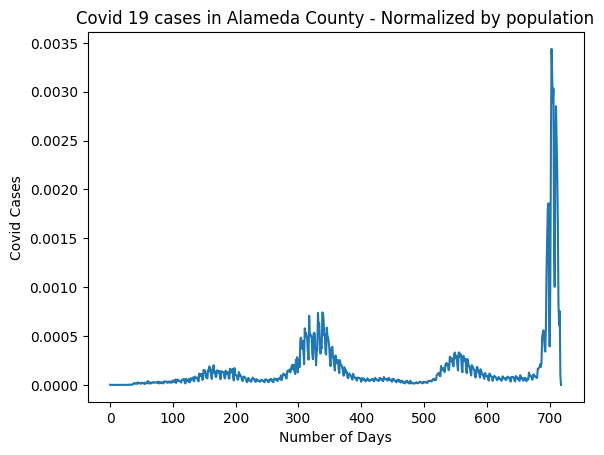

In [ ]:
fig, axes = plt.subplots()
axes.plot(one_county_df['date_offset'], one_county_df['normalized_cases'])
# adding some of the labels and axis names, because after all this is visualization class
plt.title('Covid 19 cases in Alameda County - Normalized by population')
plt.xlabel("Number of Days")
plt.ylabel("Covid Cases")
plt.show()

Let's move on to step 5, Statistical Summary.

We are going to use the code that was given to us and go from there.

In [ ]:
safe_cols_df = df.drop(columns=['date', 'area', 'area_type'])
medians_df = safe_cols_df.groupby(['date_offset']).median().reset_index()

iqr_1 = safe_cols_df.groupby(['date_offset']).quantile(0.25).reset_index()
iqr_3 = safe_cols_df.groupby(['date_offset']).quantile(0.75).reset_index()


Let's move on to step 6. We need a running average!

We are going to use 'pandas.DataFrame.rolling method' that was introduced to us.

In [ ]:
medians_rolling = medians_df.rolling(7).mean()

iqr_1_rolling = iqr_1.rolling(7).mean()
iqr_3_rolling = iqr_3.rolling(7).mean()

Finally, step 7, let's draw out our final graph!
(and step 8, which is adding all the labels)

It is time to see if my code for quantile and rolling worked fine.


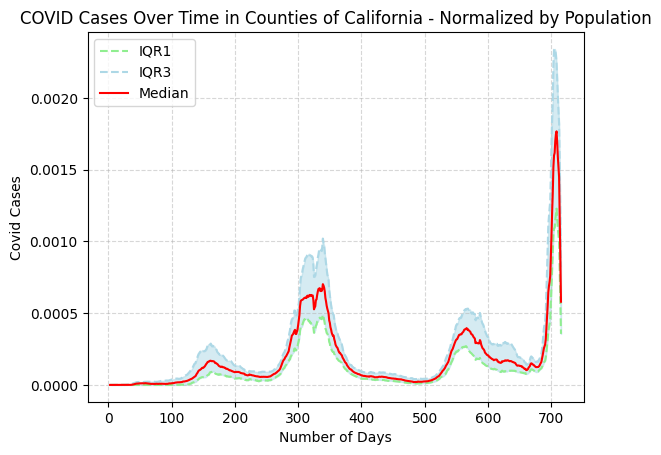

In [ ]:
fig, axes = plt.subplots()

axes.plot(iqr_1_rolling['date_offset'], iqr_1_rolling['normalized_cases'],
          c = "lightgreen", linestyle='--')

axes.plot(iqr_3_rolling['date_offset'], iqr_3_rolling['normalized_cases'],
          c = "lightblue", linestyle='--')

plt.fill_between(iqr_1_rolling['date_offset'], iqr_1_rolling['normalized_cases'], iqr_3_rolling['normalized_cases'],
                 color='lightblue', alpha=0.5, label="_nolegend_")

axes.plot(medians_rolling['date_offset'], medians_rolling['normalized_cases'],
         c = "red")

plt.grid(alpha=0.5, linestyle='--')

plt.title("COVID Cases Over Time in Counties of California - Normalized by Population")
plt.xlabel("Number of Days")
plt.ylabel("Covid Cases")

plt.legend(labels = ["IQR1", "IQR3", "Median"],
           fontsize='medium', fancybox=True)

plt.show()